# Perform data analysis on COVID-19 datasets

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Data Collection:
Obtain COVID-19 datasets from reliable sources such as the CDC1, Google Health2, or other public data repositories

In [60]:
# Load the dataset
#url = 'https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv'
#cases_data = pd.read_csv(url)
cases_data = pd.read_csv("./data/epidemiology.csv")

In [61]:
cases_data.head(100)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2020-04-05,AD,17.0,4.0,NaN,NaN,540.0,21.0,NaN,NaN
96,2020-04-06,AD,11.0,1.0,NaN,NaN,551.0,22.0,NaN,NaN
97,2020-04-07,AD,15.0,2.0,NaN,NaN,566.0,24.0,NaN,NaN
98,2020-04-08,AD,23.0,2.0,NaN,NaN,589.0,26.0,NaN,NaN


## Data Cleaning:
Inspect the dataset for missing values, duplicates, and inconsistencies.

Handle missing data by imputation or removal.

Standardize data formats (e.g., date formats, numerical values).

In [62]:
# Check for missing values in the location_key column
missing_location_keys = cases_data['location_key'].isna().sum()
print(f"Number of missing values in location_key column: {missing_location_keys}")

# Drop rows with missing location_key values
cases_data_cleaned = cases_data.dropna(subset=['location_key'])

# Verify that there are no more missing values in the location_key column
missing_location_keys_after_cleanup = cases_data_cleaned['location_key'].isna().sum()
print(f"Number of missing values in location_key column after cleanup: {missing_location_keys_after_cleanup}")

# Save the cleaned dataset to a new CSV file
cases_data_cleaned.to_csv('epidemiology_cleaned.csv', index=False)

print("Data cleanup completed and saved to epidemiology_cleaned.csv")

Number of missing values in location_key column: 987
Number of missing values in location_key column after cleanup: 0
Data cleanup completed and saved to epidemiology_cleaned.csv


np.int64(0)

## Data Exploration:

Use descriptive statistics to understand the basic features of the data.
Visualize the data using charts and graphs to identify patterns and trends.

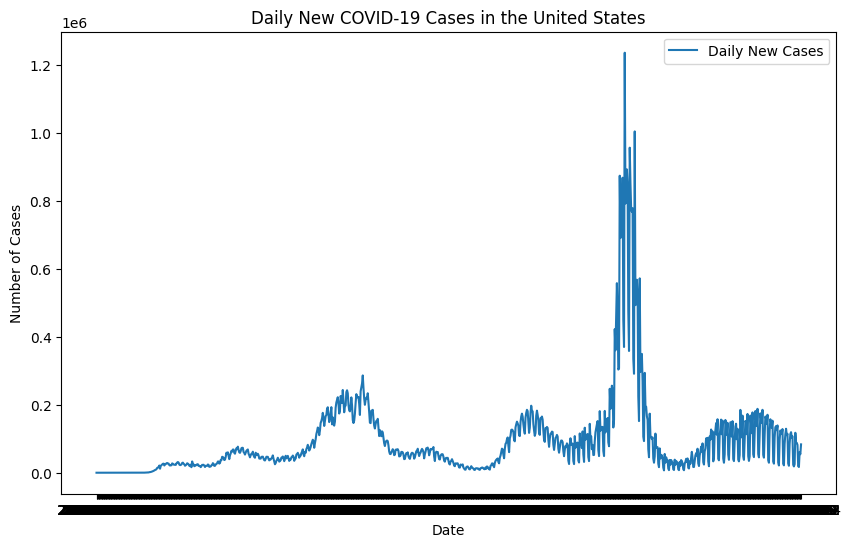

In [73]:
# Filter data for a specific country (e.g., United States)
us_data = cases_data_cleaned[cases_data_cleaned['location_key'] == 'US']

# Plot daily new cases
plt.figure(figsize=(10, 6))
plt.plot(us_data['date'], us_data['new_confirmed'], label='Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily New COVID-19 Cases in the United States')
plt.legend()
plt.show()

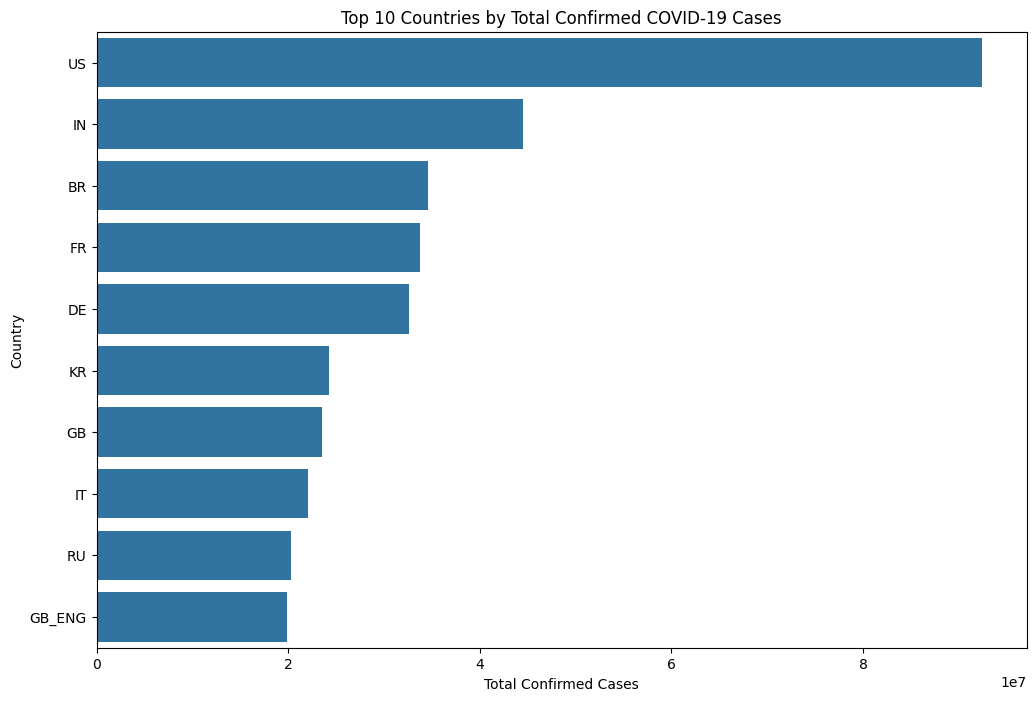

In [10]:
# Aggregate total cases by country
total_cases = data.groupby('location_key')['cumulative_confirmed'].max().reset_index()

# Plot total cases for top 10 countries
top_countries = total_cases.nlargest(10, 'cumulative_confirmed')
plt.figure(figsize=(12, 8))
sns.barplot(x='cumulative_confirmed', y='location_key', data=top_countries)
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.show()

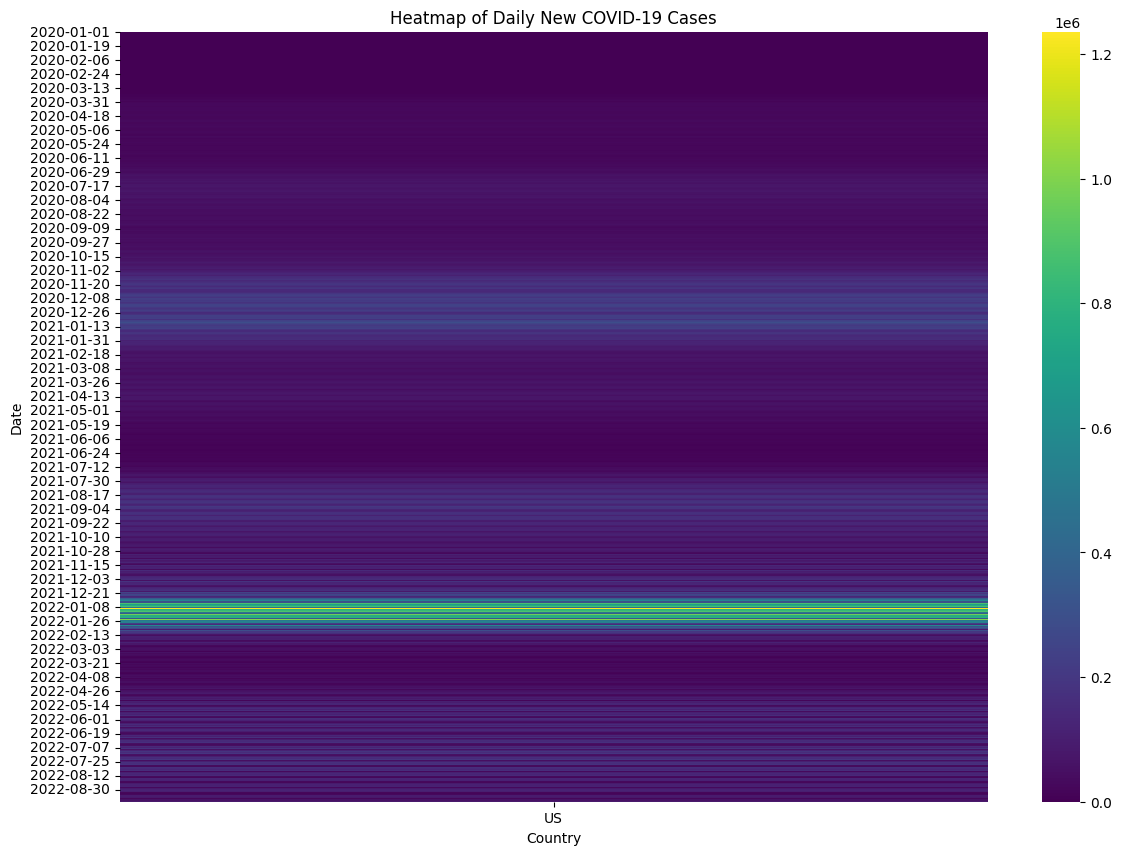

In [12]:
# Pivot data to create a heatmap
heatmap_data = us_data.pivot(index='date', columns='location_key', values='new_confirmed')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('Country')
plt.ylabel('Date')
plt.title('Heatmap of Daily New COVID-19 Cases')
plt.show()

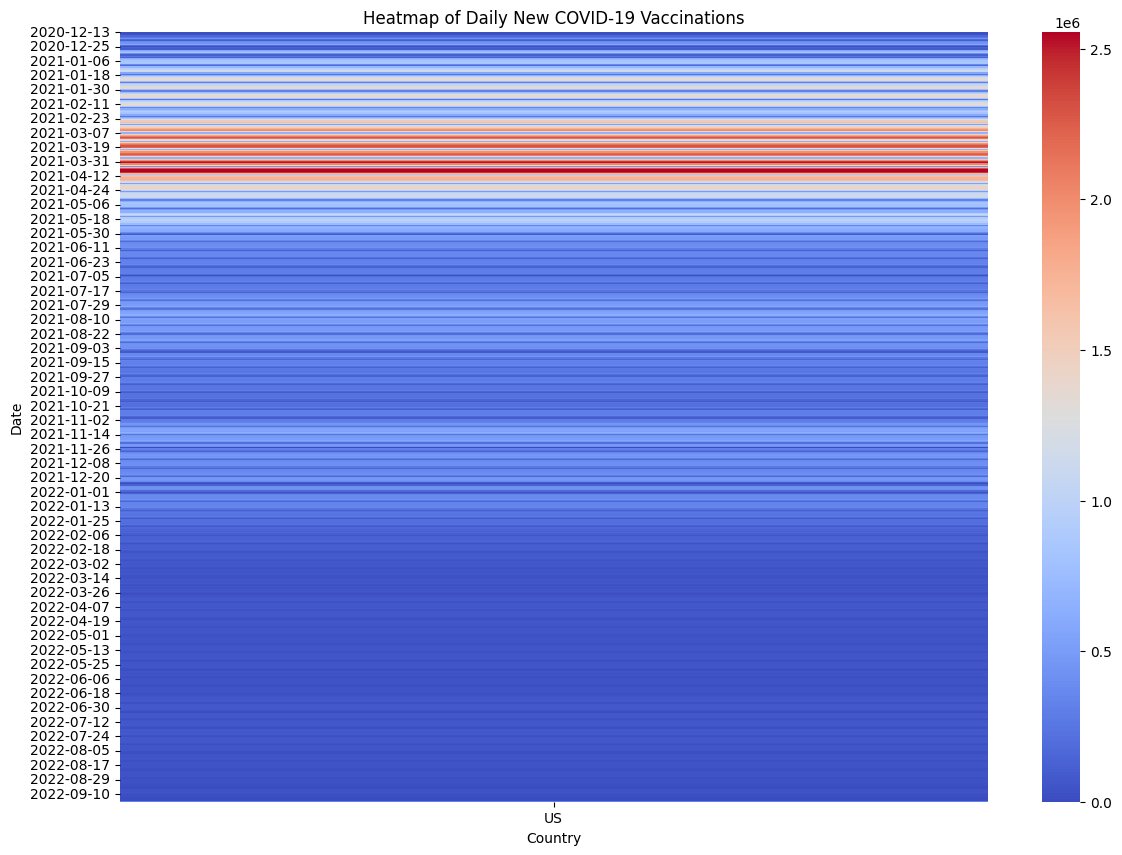

In [18]:
# Load the dataset
#url_vaccination = 'https://storage.googleapis.com/covid19-open-data/v3/vaccinations.csv'
#vaccination_data = pd.read_csv(url_vaccination)
vaccination_data = pd.read_csv("./vaccinations.csv")


# Filter data for a specific country (e.g., United States)
us_vaccination_data = vaccination_data[vaccination_data['location_key'] == 'US']

# Pivot data to create a heatmap
heatmap_vaccination_data = us_vaccination_data.pivot(index='date', columns='location_key', values='new_persons_vaccinated')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_vaccination_data, cmap='coolwarm')
plt.xlabel('Country')
plt.ylabel('Date')
plt.title('Heatmap of Daily New COVID-19 Vaccinations')
plt.show()

C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\670043425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\670043425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['month_year'] = us_data['date'].dt.to_period('M')
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\670043425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

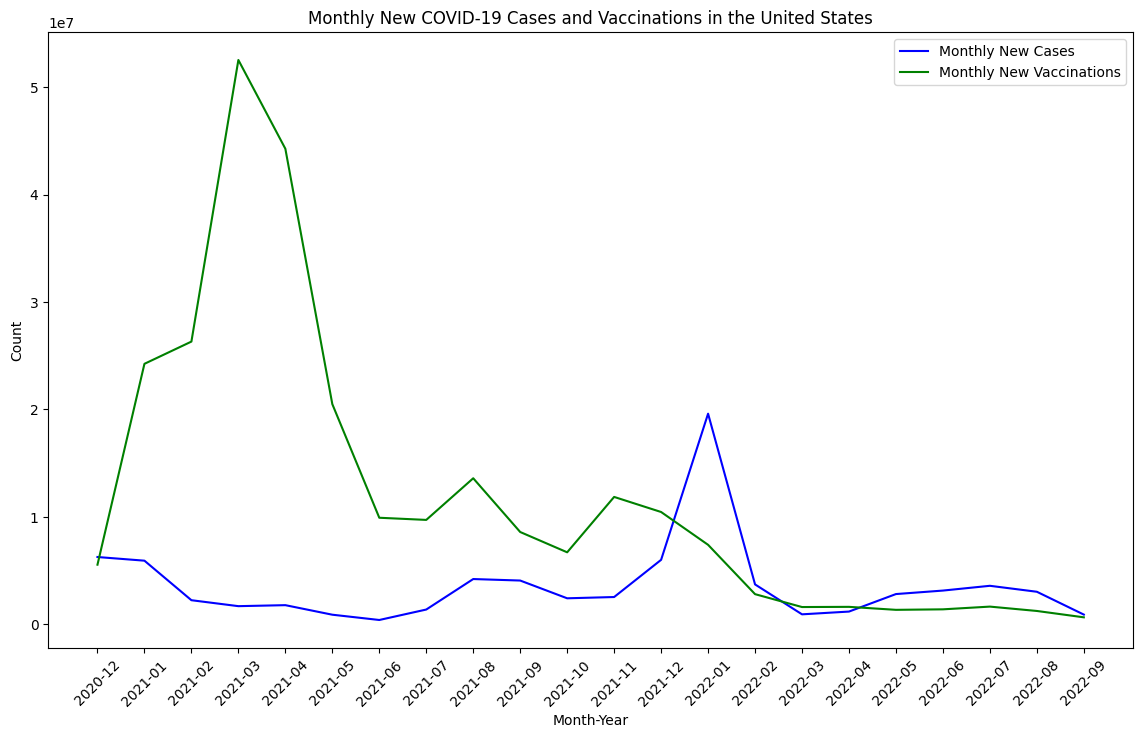

In [39]:
# Convert date to datetime format and extract month and year
us_data['date'] = pd.to_datetime(us_data['date'])
us_data['month_year'] = us_data['date'].dt.to_period('M')

us_vaccination_data['date'] = pd.to_datetime(us_vaccination_data['date'])
us_vaccination_data['month_year'] = us_vaccination_data['date'].dt.to_period('M')

# Aggregate data by month
monthly_cases = us_data.groupby('month_year')['new_confirmed'].sum().reset_index()
monthly_vaccinations = us_vaccination_data.groupby('month_year')['new_persons_vaccinated'].sum().reset_index()

# Merge the datasets on the month_year
merged_monthly_data = pd.merge(monthly_cases, monthly_vaccinations, on='month_year', how='inner')

# Plot line chart with both cases and vaccinations
plt.figure(figsize=(14, 8))
plt.plot(merged_monthly_data['month_year'].astype(str), merged_monthly_data['new_confirmed'], label='Monthly New Cases', color='blue')
plt.plot(merged_monthly_data['month_year'].astype(str), merged_monthly_data['new_persons_vaccinated'], label='Monthly New Vaccinations', color='green')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Monthly New COVID-19 Cases and Vaccinations in the United States')
plt.legend()
plt.xticks(rotation=45)
plt.show()

C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\347299631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\347299631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['month_year'] = us_data['date'].dt.to_period('M')
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\347299631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

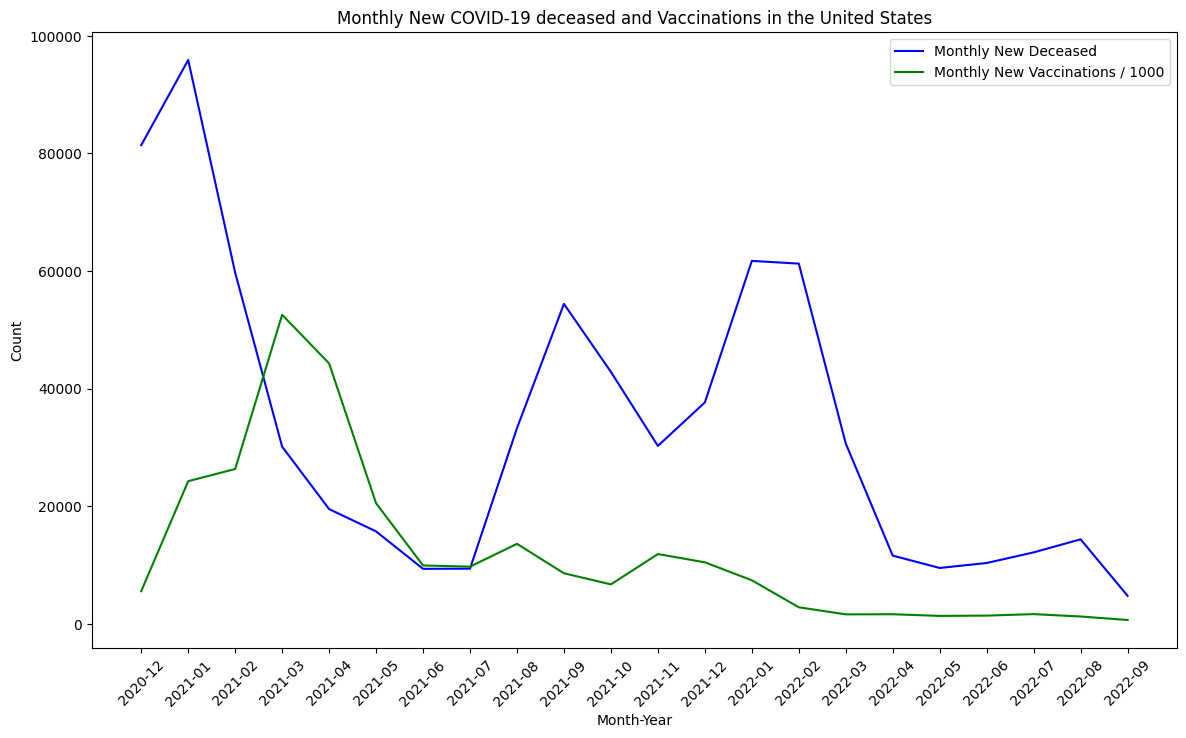

In [54]:
# Convert date to datetime format and extract month and year
us_data['date'] = pd.to_datetime(us_data['date'])
us_data['month_year'] = us_data['date'].dt.to_period('M')

us_vaccination_data['date'] = pd.to_datetime(us_vaccination_data['date'])
us_vaccination_data['month_year'] = us_vaccination_data['date'].dt.to_period('M')

# Aggregate data by month
monthly_cases = us_data.groupby('month_year')['new_deceased'].sum().reset_index()
monthly_vaccinations = us_vaccination_data.groupby('month_year')['new_persons_vaccinated'].sum().reset_index()

# Merge the datasets on the month_year
merged_monthly_data = pd.merge(monthly_cases, monthly_vaccinations, on='month_year', how='inner')

# Plot line chart with both cases and vaccinations
plt.figure(figsize=(14, 8))
plt.plot(merged_monthly_data['month_year'].astype(str), merged_monthly_data['new_deceased'], label='Monthly New Deceased', color='blue')
plt.plot(merged_monthly_data['month_year'].astype(str), merged_monthly_data['new_persons_vaccinated']/1000, label='Monthly New Vaccinations / 1000', color='green')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.title('Monthly New COVID-19 deceased and Vaccinations in the United States')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Clearly the reduced trend in vaccinations has contributed to the spike in number of new cases and deaths in United States

## Time Series Analysis for All US States
Plotting the daily new COVID-19 cases for each state. The location_key is used to filter data for US states, and the date column is converted to datetime format for proper plotting.

### Mostly the trend is same across all the states and few see less numbers like Alaska. Mostly due to less interaction with outside world

C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\451913774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_states_data['date'] = pd.to_datetime(us_states_data['date'])
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\451913774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_states_data['date'] = pd.to_datetime(us_states_data['date'])


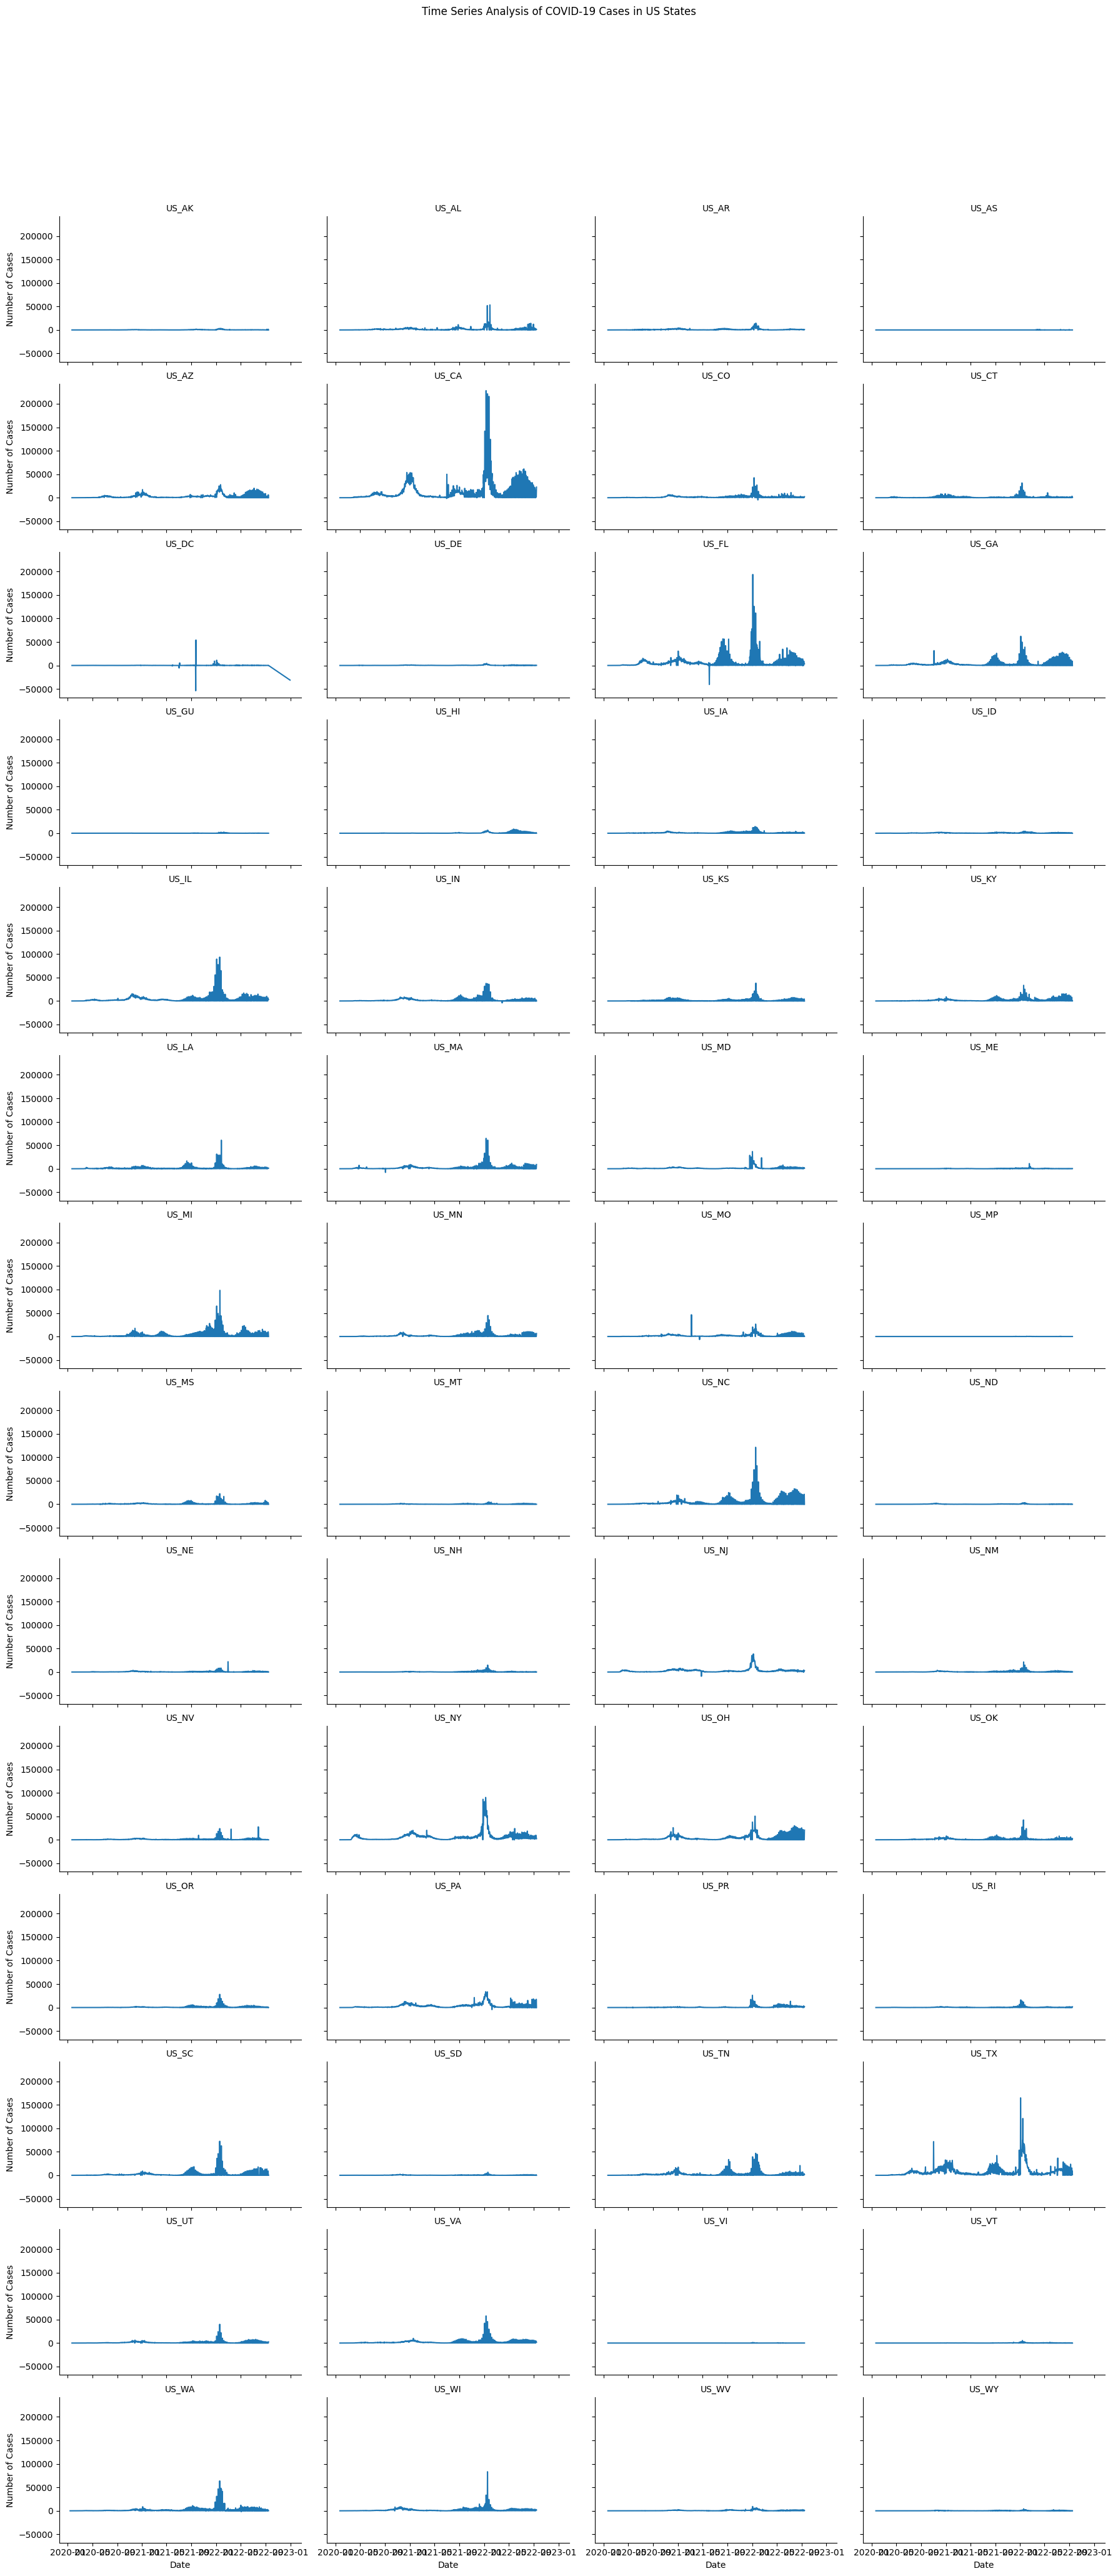

In [71]:
# Filter data for US states
# Filter data for US states (location_key starting with 'US_' and having exactly 5 characters)
us_states_data = cases_data_cleaned[cases_data_cleaned['location_key'].str.match(r'US_[A-Z]{2}$')]

# Convert date to datetime format
us_states_data['date'] = pd.to_datetime(us_states_data['date'])

# Convert date to datetime format
us_states_data['date'] = pd.to_datetime(us_states_data['date'])

# Plot time series analysis for each state in a grid plot
g = sns.FacetGrid(us_states_data, col='location_key', col_wrap=4, height=3, aspect=1.5)
g.map(sns.lineplot, 'date', 'new_confirmed')
g.set_axis_labels('Date', 'Number of Cases')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Time Series Analysis of COVID-19 Cases in US States')
plt.show()

## Checking Seasonality for US States
Convert the date to datetime format, aggregate the data by month and year, and plot the seasonality of COVID-19 cases for each state.

### colder months have seen the increaed cases in US

C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\33649174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_states_data['date'] = pd.to_datetime(us_states_data['date'])
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\33649174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_states_data['month'] = us_states_data['date'].dt.month
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\33649174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

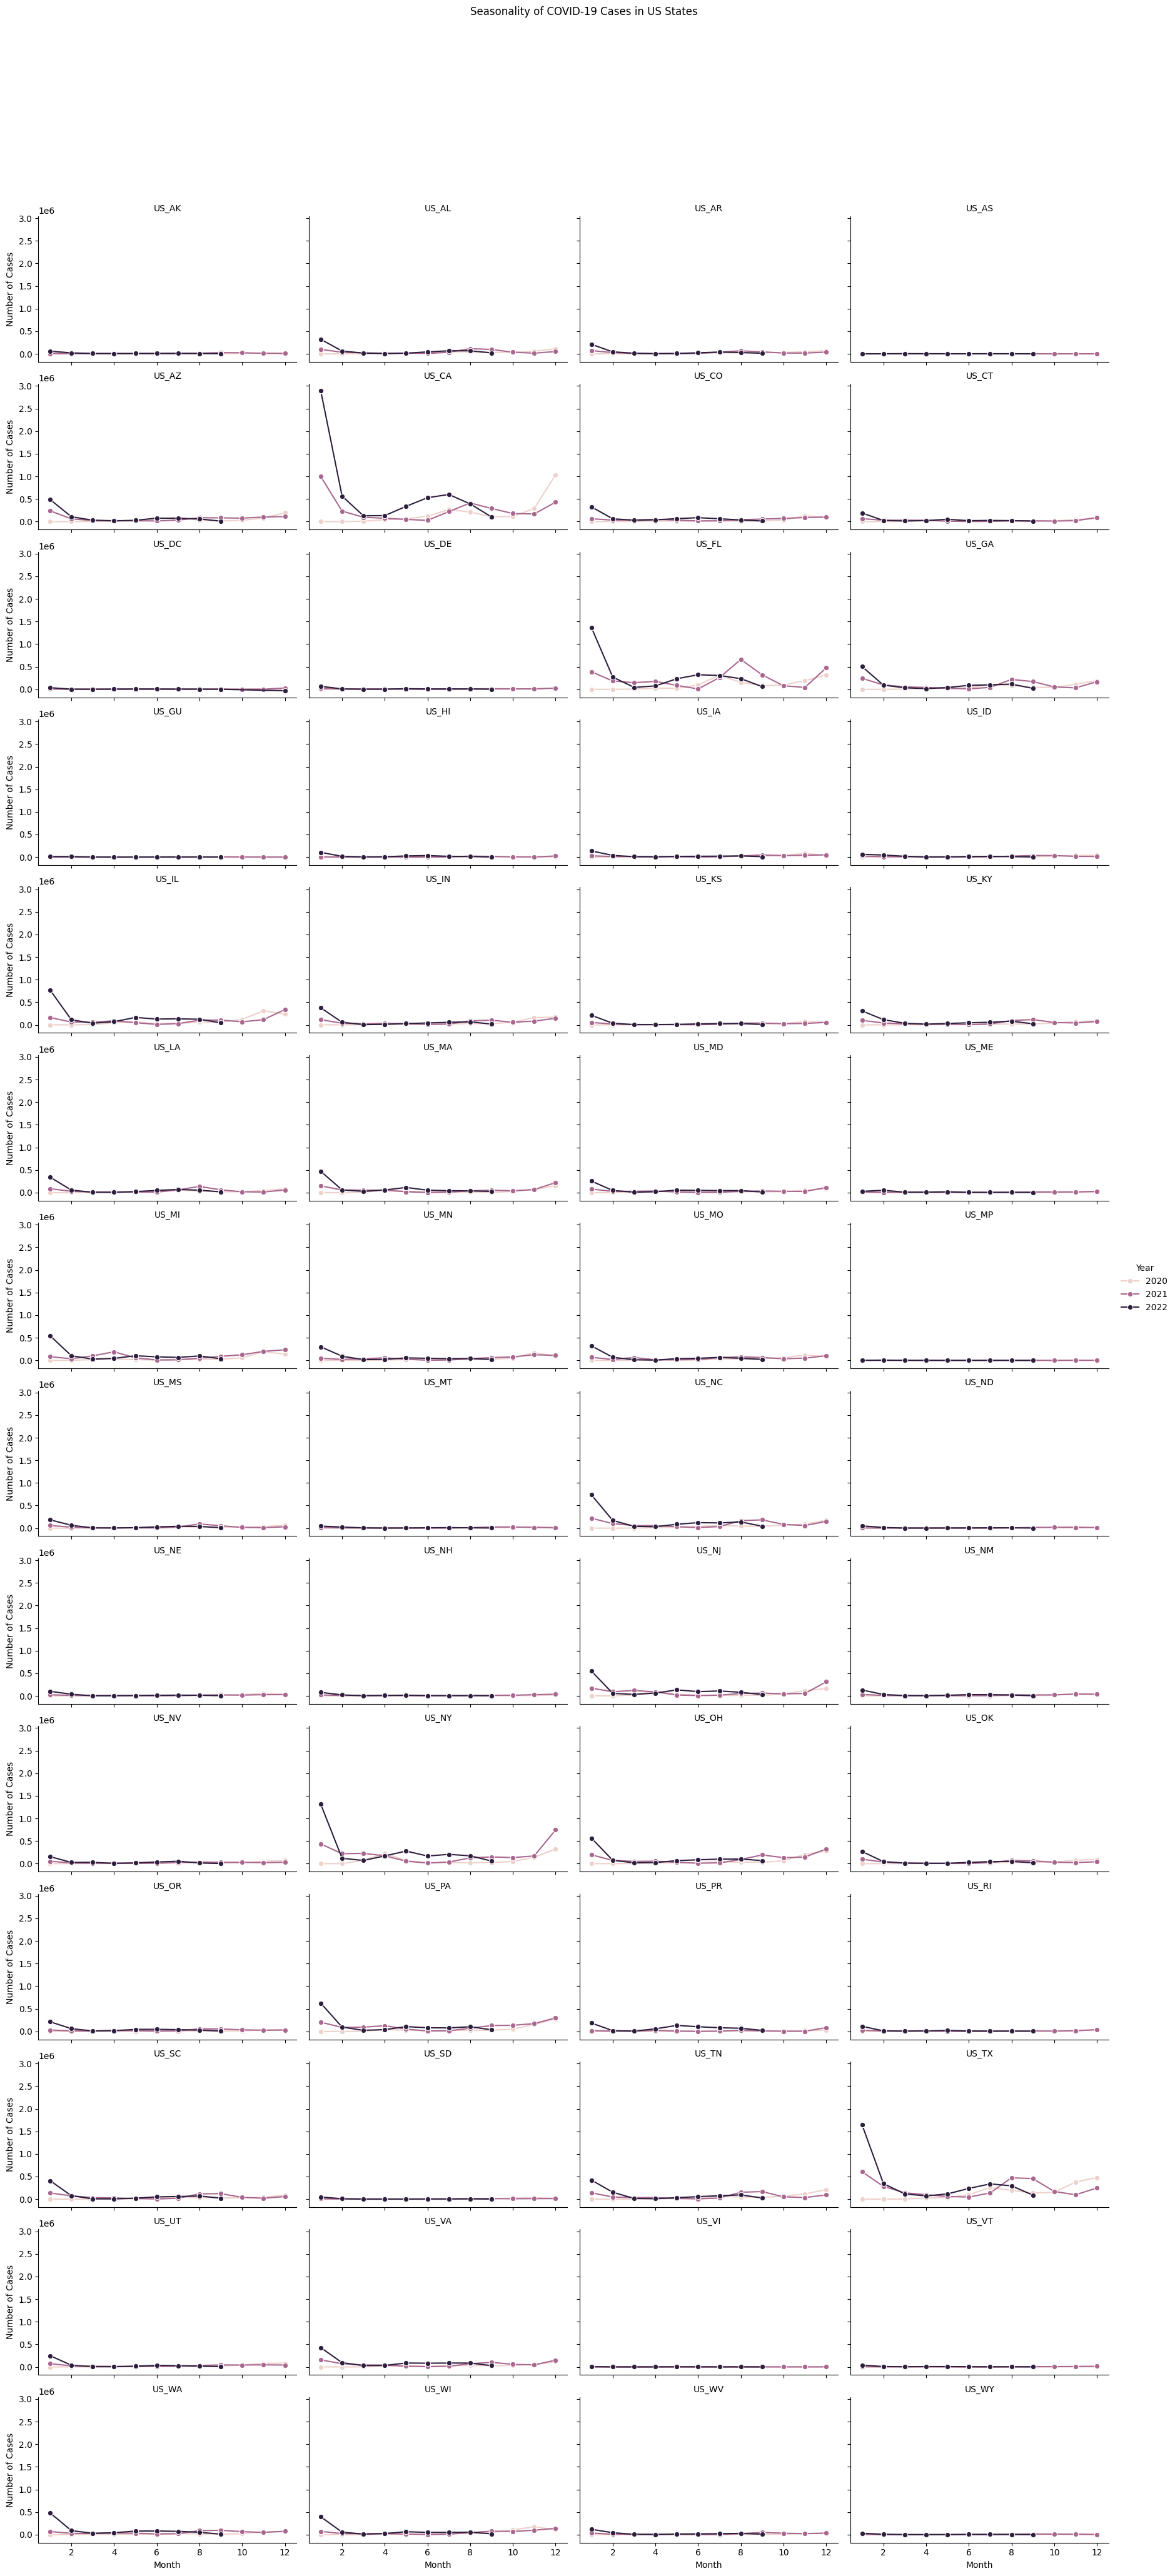

In [70]:
# Convert date to datetime format and extract month and year
us_states_data['date'] = pd.to_datetime(us_states_data['date'])
us_states_data['month'] = us_states_data['date'].dt.month
us_states_data['year'] = us_states_data['date'].dt.year

# Aggregate data by month and year for each state
monthly_cases = us_states_data.groupby(['location_key', 'year', 'month'])['new_confirmed'].sum().reset_index()

# Plot seasonality for each state
states = monthly_cases['location_key'].unique()

# Plot seasonality for each state in a grid plot
g = sns.FacetGrid(monthly_cases, col='location_key', col_wrap=4, height=3, aspect=1.5)
g.map(sns.lineplot, 'month', 'new_confirmed', 'year', marker='o')
g.add_legend(title='Year')
g.set_axis_labels('Month', 'Number of Cases')
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seasonality of COVID-19 Cases in US States')
plt.show()

## Predictive Analysis using ARIMA Mode
ARIMA model to perform predictive analysis on estimating COVID-19 cases based on vaccination trends

C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\3137473153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'])
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\3137473153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['month_year'] = us_data['date'].dt.to_period('M')
C:\Users\rragipa1\AppData\Local\Temp\ipykernel_400\3137473153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Mean Squared Error: 12169844301214.326


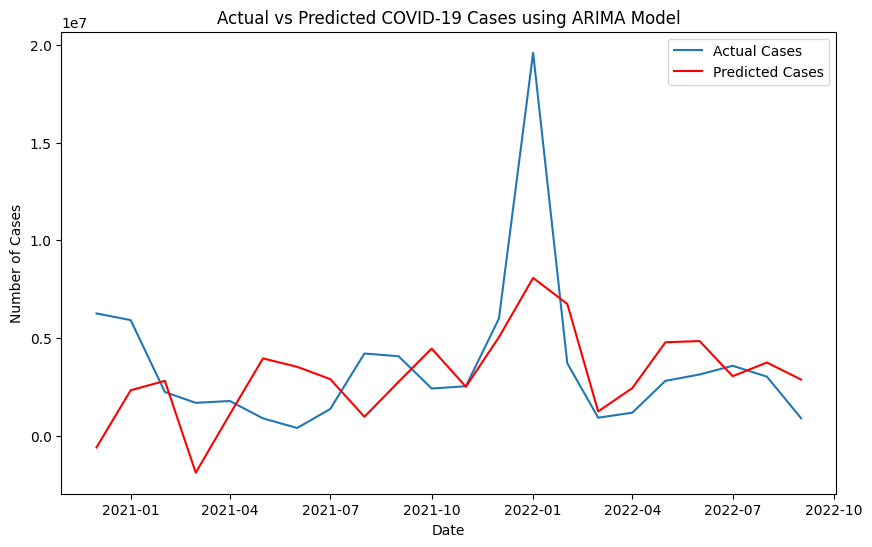

In [117]:
# Convert date to datetime format and extract month and year
us_data['date'] = pd.to_datetime(us_data['date'])
us_data['month_year'] = us_data['date'].dt.to_period('M')

us_vaccination_data['date'] = pd.to_datetime(us_vaccination_data['date'])
us_vaccination_data['month_year'] = us_vaccination_data['date'].dt.to_period('M')

# Aggregate data by month
monthly_cases = us_data.groupby('month_year')['new_confirmed'].sum().reset_index()
monthly_vaccinations = us_vaccination_data.groupby('month_year')['new_persons_vaccinated'].sum().reset_index()

# Merge the datasets on the month_year
merged_monthly_data = pd.merge(monthly_cases, monthly_vaccinations, on='month_year', how='inner')

# Prepare the data for predictive analysis
data = merged_monthly_data.set_index('month_year')
data.index = data.index.to_timestamp()

# Fit ARIMA model
model = ARIMA(data['new_confirmed'], exog=data[['new_persons_vaccinated']], order=(10, 1, 10))
model_fit = model.fit()

# Make predictions
start_index = data.index[0]
end_index = data.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index, exog=data[['new_persons_vaccinated']], dynamic=False)

# Evaluate the model
mse = mean_squared_error(data['new_confirmed'], predictions)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['new_confirmed'], label='Actual Cases')
plt.plot(data.index, predictions, label='Predicted Cases', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Actual vs Predicted COVID-19 Cases using ARIMA Model')
plt.legend()
plt.show()

### The model is decent enough to predict the trend of COVID cases based on vaccination numbers. The spike in cases during 2022 first quarter can be considered outlier and avoided overfiting to it.